<a href="https://colab.research.google.com/github/KimHyerin25/LIKELION_WEB/blob/main/0715_%EB%AA%A9_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mglearn

In [2]:
import matplotlib.pyplot as plt
import mglearn

## 인공지능 > 머신러닝 > 딥러닝
- 머신러닝
  1. 비지도학습 - 레이블이 없고
  2. 지도학습 - 레이블이 있고
    * 회귀
      feature 1개 : 단순선형회귀
      feature 여러개 : 다중선형회귀
      - knn, 회귀분석(LinearRegression) : 속도가 빠르다, 의사결정트리, 앙상블
    * 분류
      이진 분류 : 0과 1 - 로지스틱 회귀, SVM
      다항 분류 : 2개 이상 (ex. IRIS), - knn, 의사결정트리, 앙상블
      
  3. 준지도학습 - 일부는 레이블이 있고 일부는 없고
  4. 강화학습

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [4]:
import seaborn as sns

In [5]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

# 데이터 나누기

In [28]:
X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_Y, 
                                                    stratify=cancer.target, 
                                                    test_size = 0.2,
                                                    random_state=77)

In [29]:
tree=DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 셋 정확도 : ", tree.score(X_train, y_train) )
print("테스트 데이터 셋 정확도 : ", tree.score(X_test, y_test) )

학습용 데이터 셋 정확도 :  0.9802197802197802
테스트 데이터 셋 정확도 :  0.8947368421052632


In [46]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", 
                class_names=['양성', '음성'],
                feature_names = cancer.feature_names, 
                impurity = True,  # gini 계수
                filled=True)       # color 

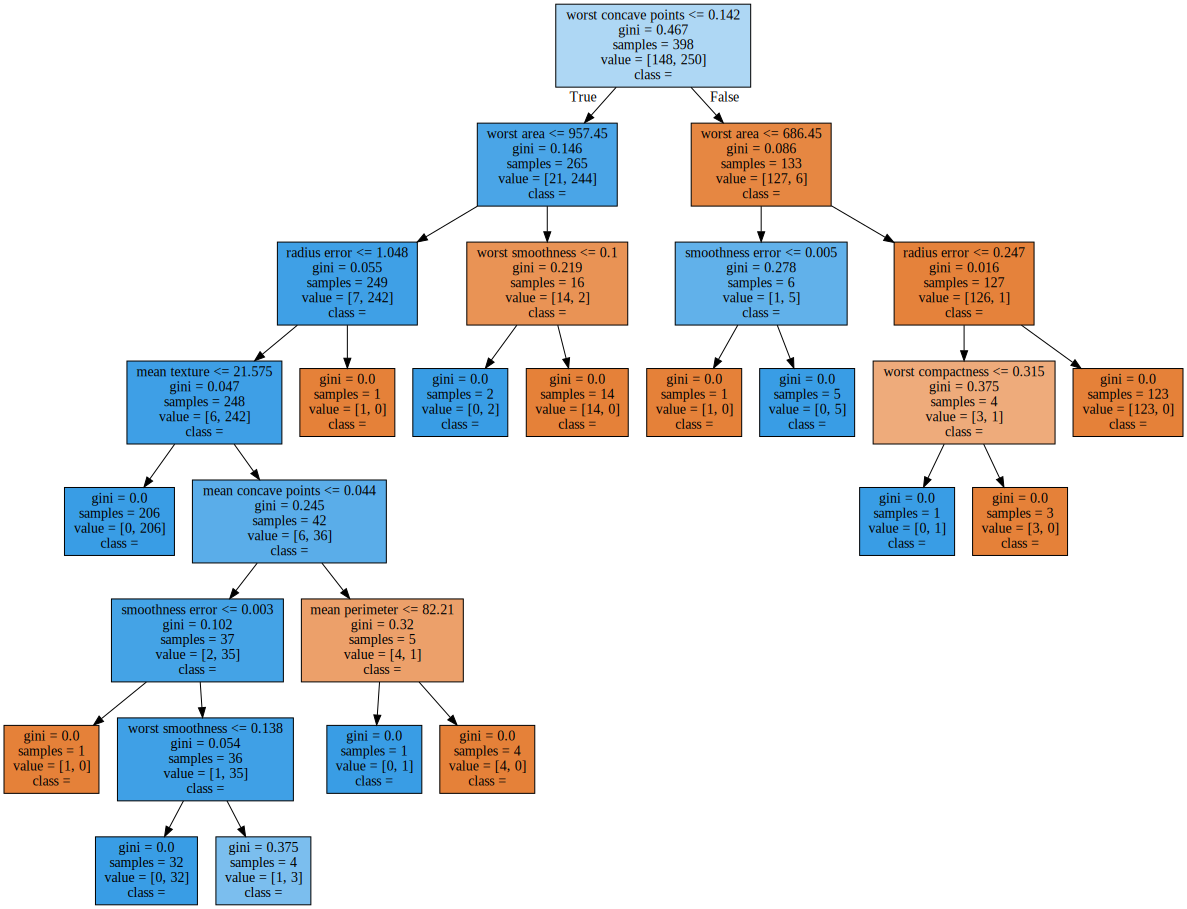

In [47]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [41]:
import numpy as np

In [11]:
cancer.data.shape
#여기서 30을 뽑아야함

(569, 30)

In [48]:
def plot_feature_imp_cancer(model):
  n_features = cancer.data.shape[1]  # feature의 개수
  imp = model.feature_importances_
  plt.barh( range(n_features), imp, align='center' )
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("feature")
  plt.ylim(-1, n_features)

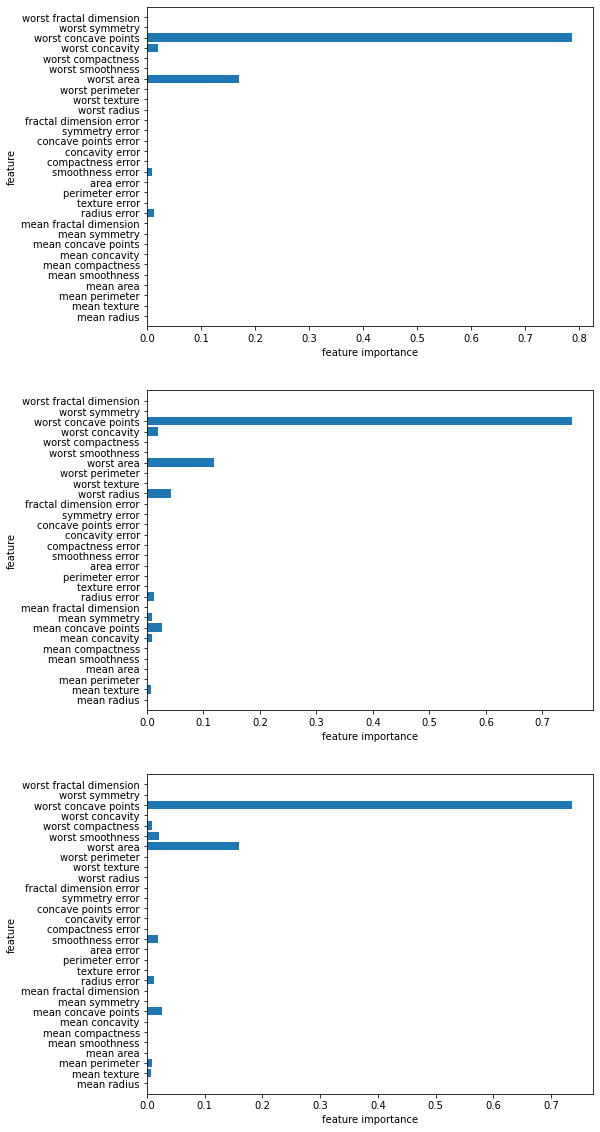

In [49]:
plt.figure(figsize=(8,20))
depth_num = [3,5,7]
for idx, val in enumerate(depth_num):
  X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y, 
                                                      stratify=cancer.target,
                                                      test_size=0.3,
                                                      random_state=77)
  tree = DecisionTreeClassifier(max_depth=val,random_state=0)
  tree.fit(X_train,  y_train)
  plt.subplot(3,1,idx+1)
  plot_feature_imp_cancer(tree)

# 타이타닉 데이터 불러오기

In [70]:
import seaborn as sns
dat = sns.load_dataset("titanic")

sel = ['pclass', 'sibsp', 'parch', 'sex_lbl']
X = dat[sel]
y = dat['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      stratify=y,
                                                      test_size=0.3,
                                                      random_state=77)

m = DecisionTreeClassifier(max_depth=4, random_state=0)
m.fit(X_train, y_train)

KeyError: ignored

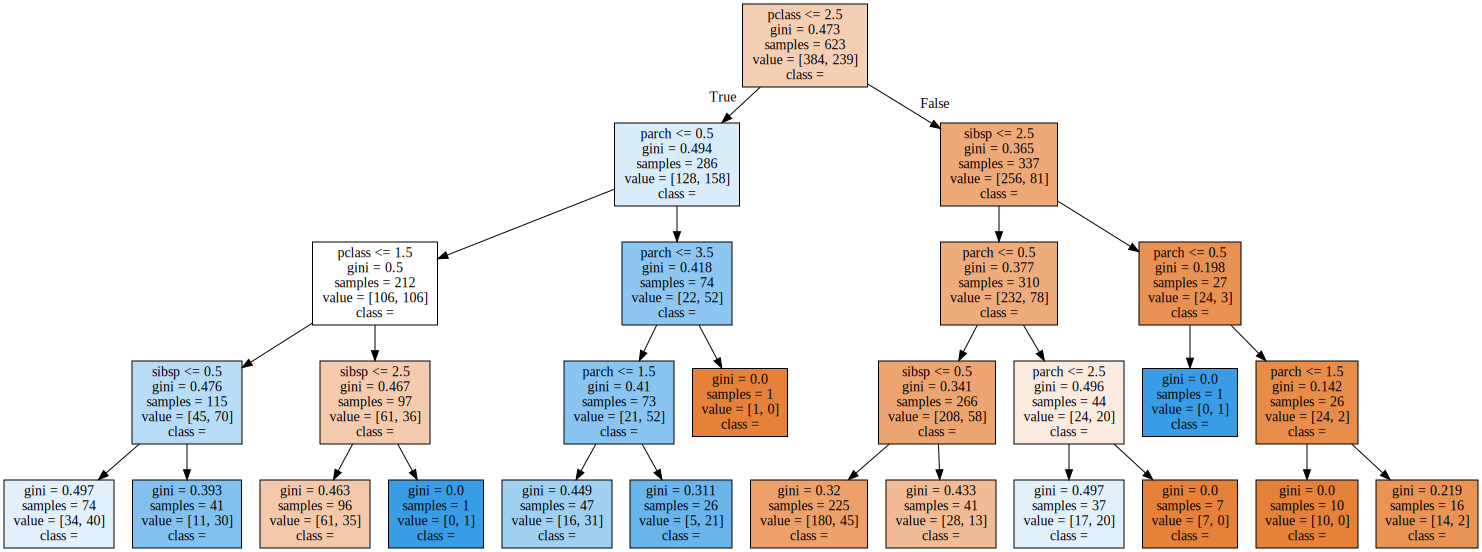

In [51]:
from sklearn.tree import export_graphviz
export_graphviz(m, out_file="tree.dot", 
                class_names=['사망', '생존'],
                feature_names = sel, 
                impurity = True,  # gini 계수
                filled=True)       # color 
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [54]:
dat

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [78]:
sex = {'male':1, 'female':2}
embarked = {'S':1, 'C':2, 'Q':3}


dat['sex_lbl'] = dat['sex'].map(sex)
dat['sex_lbl'] = dat['embarked'].map(embarked)
# dat['sex_lbl'].fillna(0)
# dat['sex_lbl'] = dat['sex_lbl'].fillna(0.)
# dat['sex_lbl'].unique
# dat['sex_lbl'] = dat['sex_lbl'].replace('1.0', 1)
# dat['sex_lbl'] = dat['sex_lbl'].replace('2.0', 2)
# dat['sex_lbl'] = dat['sex_lbl'].replace('3.0', 3)
dat['sex_lbl']

0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    2.0
890    3.0
Name: sex_lbl, Length: 891, dtype: float64

In [56]:
# dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  sex_lbl      889 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(4), object(5)
memory usage: 87.6+ KB


# 데이터 불러오기

In [82]:
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_diabetes

In [81]:
pima = pd.read_csv('/content/diabetes.csv')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [87]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [106]:
sel = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[sel] #입력
y = pima['Outcome'] #출력
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1) # 70% training and 30%

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [117]:
### 모델 만들기
model = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
print("학습용 데이터 평가 : ", model.score(X_train, y_train))
print("테스트용 데이터 평가 : ", model.score(X_test, y_test))

학습용 데이터 평가 :  0.8044692737430168
테스트용 데이터 평가 :  0.7619047619047619


In [135]:
depth_nums = range(1,15,1)
size_nums = range(1, 5, 1)

for num in size_nums:
  # 데이터 셋 나누기
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=num/10, 
                                                      random_state=1) # 70% training and 30%
  for i in depth_nums:
    model = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("test_size : %.1f, max_depth : %d" % (num/10, i))
    print("학습용 데이터 평가 : ", model.score(X_train, y_train))
    print("테스트용 데이터 평가 : ", model.score(X_test, y_test))
    print("오차 : ", model.score(X_train, y_train)-model.score(X_test, y_test), "\n")

  #max_depth 테스트용 데이터 평가가 가장 높은 4가 그나마 좋음. 학습용 데이터가 99점은 과대평가일듯

test_size : 0.1, max_depth : 1
학습용 데이터 평가 :  0.7337192474674384
테스트용 데이터 평가 :  0.7532467532467533
오차 :  -0.019527505779314835 

test_size : 0.1, max_depth : 2
학습용 데이터 평가 :  0.7698986975397974
테스트용 데이터 평가 :  0.7922077922077922
오차 :  -0.0223090946679948 

test_size : 0.1, max_depth : 3
학습용 데이터 평가 :  0.7756874095513748
테스트용 데이터 평가 :  0.7792207792207793
오차 :  -0.003533369669404429 

test_size : 0.1, max_depth : 4
학습용 데이터 평가 :  0.7945007235890015
테스트용 데이터 평가 :  0.7532467532467533
오차 :  0.0412539703422482 

test_size : 0.1, max_depth : 5
학습용 데이터 평가 :  0.8350217076700435
테스트용 데이터 평가 :  0.7662337662337663
오차 :  0.0687879414362772 

test_size : 0.1, max_depth : 6
학습용 데이터 평가 :  0.85383502170767
테스트용 데이터 평가 :  0.7662337662337663
오차 :  0.08760125547390374 

test_size : 0.1, max_depth : 7
학습용 데이터 평가 :  0.9015918958031838
테스트용 데이터 평가 :  0.6883116883116883
오차 :  0.21328020749149545 

test_size : 0.1, max_depth : 8
학습용 데이터 평가 :  0.9305354558610709
테스트용 데이터 평가 :  0.7142857142857143
오차 :  0.216249741575

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 30,
                                                    random_state=77)
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
tree.feature_importances_

array([0.        , 0.66993599, 0.        , 0.        , 0.        ,
       0.17810818, 0.        , 0.15195583])

In [164]:
imp = tree.feature_importances_ #변수의 중요도  
col_index= np.argsort(-imp)[:3]
for k in col_index:
  print(sel[k])

Glucose
BMI
Age


In [159]:
def plot_feature_imp_pima(model):
  n_features = pima.shape[1]  # feature의 개수
  imp = model.feature_importances_
  plt.barh( range(n_features), imp, align='center' )
  plt.yticks(np.arange(n_features), pima.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("feature")
  plt.ylim(-1, n_features)


In [166]:
size = [0.1,0.2,0.3,0.4,0.5]
for j in size:
  #데이터셋 나누기
  X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify= y,
                                                    test_size=j,
                                                    random_state=1)
  print("testsize: ",j)
  #의사결정나무 그리기 : 과대적합 되지 않는 max_depth 찾기
  #모델 만들기
  for i in range(1,7):
    tree = DecisionTreeClassifier(max_depth = i, random_state=0) # 분류의 모델을 사용함, 지정을 하지 않으면 depth가 끝까지 내려간다. 끝까지 내려가면 과대적합이 발생한다.
    tree.fit(X_train, y_train)
    #평가
    print("depth: ", i)
    print('학습용 데이터 평가:', tree.score(X_train, y_train))
    print('테스트용 데이터 평가:', tree.score(X_test,y_test))
    print(tree.score(X_train, y_train) - tree.score(X_test,y_test))
    imp = tree.feature_importances_ #변수의 중요도  
    col_index= np.argsort(-imp)[:3]
    for k in col_index:
      print(sel[k]) 

testsize:  0.1
depth:  1
학습용 데이터 평가: 0.7424023154848046
테스트용 데이터 평가: 0.6753246753246753
0.06707764016012929
Glucose
Pregnancies
BloodPressure
depth:  2
학습용 데이터 평가: 0.7800289435600579
테스트용 데이터 평가: 0.7012987012987013
0.07873024226135661
Glucose
BMI
Age
depth:  3
학습용 데이터 평가: 0.784370477568741
테스트용 데이터 평가: 0.7012987012987013
0.0830717762700397
Glucose
BMI
Age
depth:  4
학습용 데이터 평가: 0.7988422575976846
테스트용 데이터 평가: 0.7012987012987013
0.09754355629898326
Glucose
BMI
Age
depth:  5
학습용 데이터 평가: 0.8480463096960926
테스트용 데이터 평가: 0.6883116883116883
0.1597346213844043
Glucose
BMI
Age
depth:  6
학습용 데이터 평가: 0.8712011577424024
테스트용 데이터 평가: 0.6883116883116883
0.18288946943071405
Glucose
BMI
Age
testsize:  0.2
depth:  1
학습용 데이터 평가: 0.739413680781759
테스트용 데이터 평가: 0.7207792207792207
0.01863446000253821
Glucose
Pregnancies
BloodPressure
depth:  2
학습용 데이터 평가: 0.7768729641693811
테스트용 데이터 평가: 0.7532467532467533
0.023626210922627844
Glucose
BMI
Age
depth:  3
학습용 데이터 평가: 0.7785016286644951
테스트용 데이터 평가: 0.759740259

In [167]:
test_size_list = list(range(5, 41, 5))
for i in test_size_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=0)
    for j in range(1, 11):
        model = DecisionTreeClassifier(max_depth=j, random_state=0).fit(X_train, y_train)
        print('max_depth =', j, 'test_size =', i/100)
        print('학습용 데이터 평가 :', round(model.score(X_train, y_train), 4))
        print('테스트용 데이터 평가 :', round(model.score(X_test, y_test), 4))
        model_dict = dict(zip(list(X_train.columns), list(model.feature_importances_)))
        model_df = pd.Series(model_dict)
        print(model_df.sort_values(ascending=False).head(3))
        print()

max_depth = 1 test_size = 0.05
학습용 데이터 평가 : 0.727
테스트용 데이터 평가 : 0.8974
Glucose                     1.0
Age                         0.0
DiabetesPedigreeFunction    0.0
dtype: float64

max_depth = 2 test_size = 0.05
학습용 데이터 평가 : 0.7654
테스트용 데이터 평가 : 0.8974
Glucose    0.628198
BMI        0.201744
Age        0.170058
dtype: float64

max_depth = 3 test_size = 0.05
학습용 데이터 평가 : 0.7682
테스트용 데이터 평가 : 0.8974
Glucose    0.600307
BMI        0.264214
Age        0.135479
dtype: float64

max_depth = 4 test_size = 0.05
학습용 데이터 평가 : 0.7874
테스트용 데이터 평가 : 0.8718
Glucose    0.548863
BMI        0.264469
Age        0.157659
dtype: float64

max_depth = 5 test_size = 0.05
학습용 데이터 평가 : 0.8326
테스트용 데이터 평가 : 0.8974
Glucose    0.464944
BMI        0.216109
Age        0.146791
dtype: float64

max_depth = 6 test_size = 0.05
학습용 데이터 평가 : 0.8505
테스트용 데이터 평가 : 0.8718
Glucose    0.399224
BMI        0.238566
Age        0.141258
dtype: float64

max_depth = 7 test_size = 0.05
학습용 데이터 평가 : 0.8944
테스트용 데이터 평가 : 0.7692
Gluco

In [168]:
depth_nums=range(1,5,1)
size_nums=range(1,5,1)
for num in size_nums:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=num/10,random_state=1)
    for one in depth_nums:
        model=DecisionTreeClassifier(max_depth=one, random_state=0).fit(X_train,y_train)
        print('test_size: %.2f,tree depth: %d' %(num/10,one))
        print('학습용 데이터평가:',model.score(X_train,y_train))
        print('테스트용 데이터평가:',model.score(X_test,y_test))
        print('차이:',model.score(X_train,y_train)-model.score(X_test,y_test))
        importance_df=pd.DataFrame(model.feature_importances_,index=X_train.columns)
        importance_df=importance_df.sort_values(by=0,ascending=False).head(3)
        print(importance_df)
        print()

test_size: 0.10,tree depth: 1
학습용 데이터평가: 0.7337192474674384
테스트용 데이터평가: 0.7532467532467533
차이: -0.019527505779314835
                 0
Glucose        1.0
Pregnancies    0.0
BloodPressure  0.0

test_size: 0.10,tree depth: 2
학습용 데이터평가: 0.7698986975397974
테스트용 데이터평가: 0.7922077922077922
차이: -0.0223090946679948
                0
Glucose  0.677061
BMI      0.191543
Age      0.131396

test_size: 0.10,tree depth: 3
학습용 데이터평가: 0.7756874095513748
테스트용 데이터평가: 0.7792207792207793
차이: -0.003533369669404429
                0
Glucose  0.711815
BMI      0.184659
Age      0.103526

test_size: 0.10,tree depth: 4
학습용 데이터평가: 0.7945007235890015
테스트용 데이터평가: 0.7532467532467533
차이: 0.0412539703422482
                0
Glucose  0.617702
BMI      0.226053
Age      0.104628

test_size: 0.20,tree depth: 1
학습용 데이터평가: 0.7361563517915309
테스트용 데이터평가: 0.7337662337662337
차이: 0.0023901180252972054
                 0
Glucose        1.0
Pregnancies    0.0
BloodPressure  0.0

test_size: 0.20,tree depth: 2
학습용 데이터평가: 0.7654

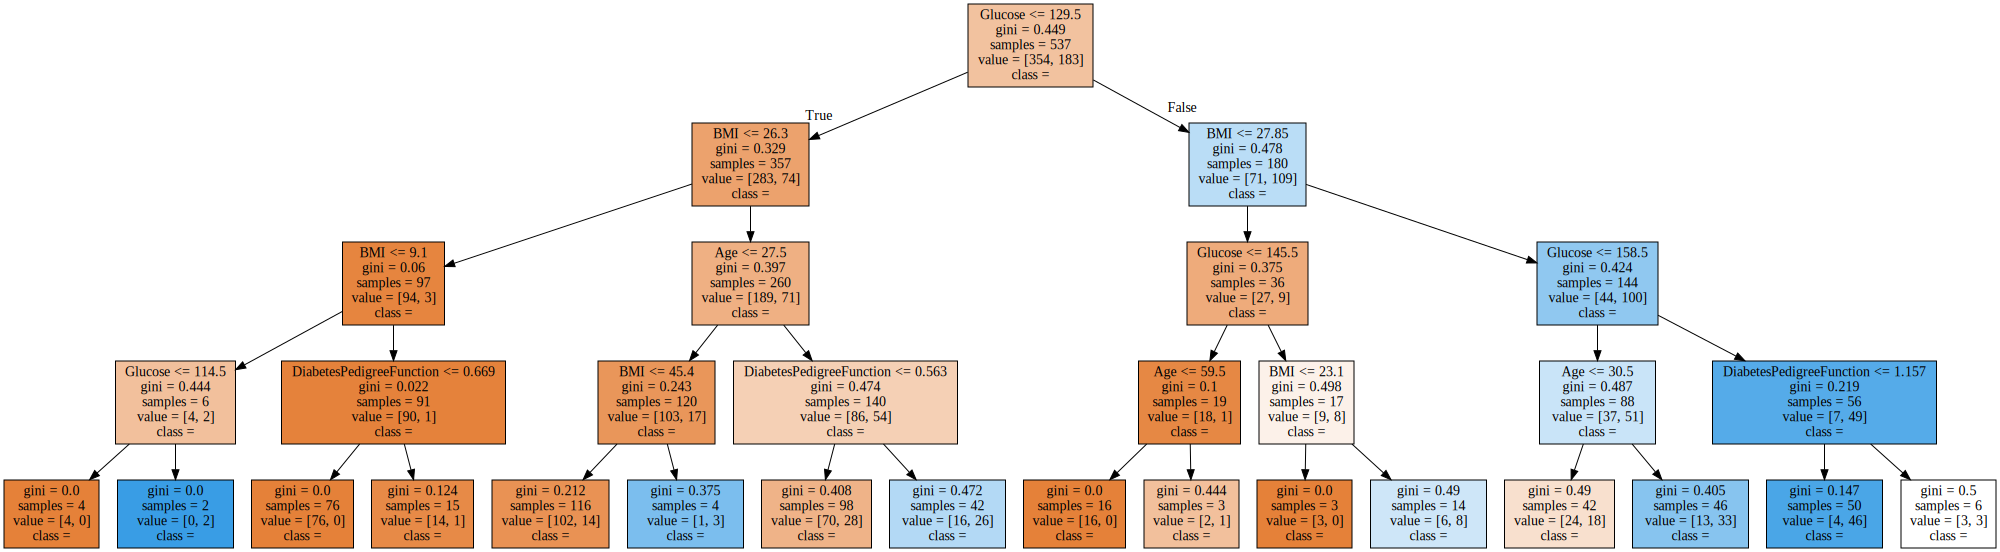

In [100]:
## 모델 만들기 코드는 개인

from sklearn.tree import export_graphviz
export_graphviz(model, out_file="tree.dot", 
                class_names=['당뇨', '당뇨아님'],
                feature_names = sel, 
                impurity = True,  # gini 계수
                filled=True)       # color 
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [101]:
def plot_feature_imp_pima(model):
  n_features = pima.data.shape[1]  # feature의 개수
  imp = model.feature_importances_
  plt.barh( range(n_features), imp, align='center' )
  plt.yticks(np.arange(n_features), pima.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("feature")
  plt.ylim(-1, n_features)

In [103]:
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_diabetes

In [104]:
pima = pd.read_csv('diabetes.csv')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
